# Inverting log-signatures

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from esig import tosig

import base
import logsig_inversion
from utils.leadlag import leadlag

## Generate path

In [8]:
# Pip size
pip = 0.01

# Number of pips for search space
n_pips = 10

# Number of points
n_points = 21

path = np.r_[0., pip * np.random.randint(-n_pips, n_pips, size=n_points - 1).cumsum()]

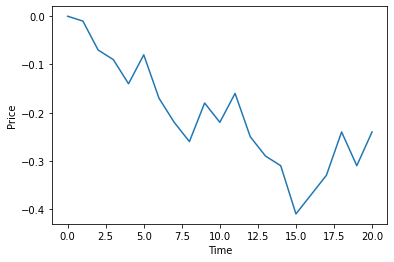

In [9]:
plt.plot(path)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [10]:
# Compute log-signature

order = 4
leadlag_path = leadlag(path)
logsig = tosig.stream2logsig(leadlag_path, order)

print(f"Log-signature: {logsig}")

Log-signature: [-0.24       -0.24       -0.0376      0.003955    0.004177   -0.00028431
 -0.00056719 -0.00030165]


## Invert log-signature

In [11]:
n_iterations = 100
n_organisms = 1000
recovered_path, loss = logsig_inversion.train(logsig, order, n_iterations, n_organisms, n_points,
                                              pip, n_pips)

  0%|          | 0/100 [00:00<?, ?it/s]

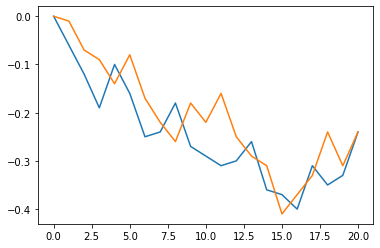

Real log-signature: [-0.24       -0.24       -0.0376      0.003955    0.004177   -0.00028431
 -0.00056719 -0.00030165]
Recovered log-signature: [-0.24       -0.24       -0.0377      0.0039555   0.0041355  -0.00028974
 -0.000558   -0.00028953]


In [12]:
plt.plot(recovered_path)
plt.plot(path)
plt.show()
print(f"Real log-signature: {logsig}")
print(f"Recovered log-signature: {tosig.stream2logsig(leadlag(recovered_path), order)}")